In [3]:
## import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import chi2_contingency


In [4]:
!pip install matplotlib

In [5]:
data=pd.read_csv("dataset.csv")

In [6]:
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [8]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [9]:
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [10]:
data.dtypes

erythema                                     int64
scaling                                      int64
definite_borders                             int64
itching                                      int64
koebner_phenomenon                           int64
polygonal_papules                            int64
follicular_papules                           int64
oral_mucosal_involvement                     int64
knee_and_elbow_involvement                   int64
scalp_involvement                            int64
family_history                               int64
melanin_incontinence                         int64
eosinophils_in_the_infiltrate                int64
PNL_infiltrate                               int64
fibrosis_of_the_papillary_dermis             int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
clubbing_of_the_rete_ridges    

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
erythema,366.0,2.068306,0.664753,0.0,2.0,2.0,2.0,3.0
scaling,366.0,1.795082,0.701527,0.0,1.0,2.0,2.0,3.0
definite_borders,366.0,1.549180,0.907525,0.0,1.0,2.0,2.0,3.0
itching,366.0,1.366120,1.138299,0.0,0.0,1.0,2.0,3.0
koebner_phenomenon,366.0,0.633880,0.908016,0.0,0.0,0.0,1.0,3.0
polygonal_papules,366.0,0.448087,0.957327,0.0,0.0,0.0,0.0,3.0
follicular_papules,366.0,0.166667,0.570588,0.0,0.0,0.0,0.0,3.0
oral_mucosal_involvement,366.0,0.377049,0.834147,0.0,0.0,0.0,0.0,3.0
knee_and_elbow_involvement,366.0,0.614754,0.982979,0.0,0.0,0.0,1.0,3.0
scalp_involvement,366.0,0.519126,0.905639,0.0,0.0,0.0,1.0,3.0


In [13]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

Exploratory data analysis

Univariate

    Check for distribution : histplot is used to check distrubution of data
    count plot is used to check wether data is balanced or not



<Axes: xlabel='class', ylabel='count'>

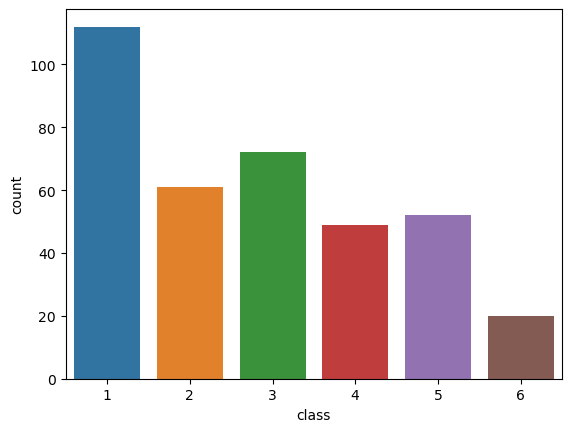

In [14]:
# check wether data is balanced or not
# data balanced : Equal number of records related of diabetic and non diabetic patients
sns.countplot(x=data['class'])


In [15]:
data['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

Insights

Clearly data is Imbalanced since we have more recors related to 1 and less records related to 6


# check for distrubution of data

In [16]:
data['Age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [17]:
data['Age'] = data['Age'].replace('?', np.nan)

# Calculez la moyenne en ignorant les NaN
mean_age = data['Age'].astype(float).mean()

# Remplacez les NaN par la moyenne calculée
data['Age'] = data['Age'].replace(np.nan, mean_age)

In [18]:
data['Age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', 36.29608938547486, '15', '46', '62', '35', '48', '12',
       '52', '60', '32', '19', '29', '25', '36', '13', '27', '31', '28',
       '64', '39', '47', '16', '0', '7', '70', '37', '61', '67', '56',
       '53', '24', '58', '49', '63', '68', '9', '75'], dtype=object)

In [19]:
data['Age'] = data['Age'].astype(int)

In [20]:
data['Age'].unique()

array([55,  8, 26, 40, 45, 41, 18, 57, 22, 30, 20, 21, 10, 65, 38, 23, 17,
       51, 42, 44, 33, 43, 50, 34, 36, 15, 46, 62, 35, 48, 12, 52, 60, 32,
       19, 29, 25, 13, 27, 31, 28, 64, 39, 47, 16,  0,  7, 70, 37, 61, 67,
       56, 53, 24, 58, 49, 63, 68,  9, 75])

In [21]:
data['Age'].value_counts()

36    24
50    17
40    17
27    16
22    15
55    14
35    14
25    14
30    13
33    12
52    11
60    11
42    10
18     9
20     8
34     8
62     7
8      7
51     7
10     7
45     7
47     6
46     6
32     6
19     6
44     5
17     5
28     5
16     5
48     5
56     5
43     4
7      4
70     4
41     4
12     3
29     3
23     3
26     3
38     3
21     3
57     2
9      2
24     2
53     2
61     2
13     2
37     2
65     2
39     2
31     2
15     2
0      1
67     1
64     1
58     1
49     1
63     1
68     1
75     1
Name: Age, dtype: int64

<Axes: ylabel='Density'>

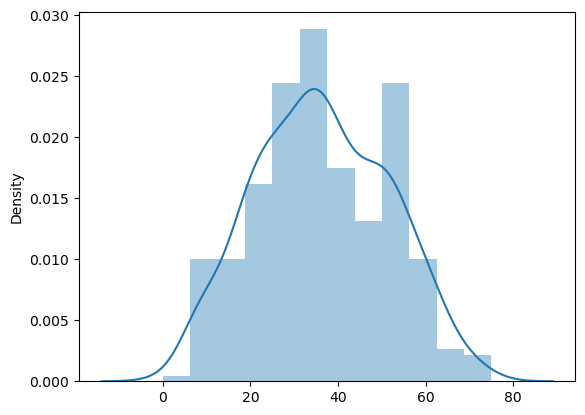

In [22]:
# Check distribution of price
sns.distplot(x=data.Age,kde=True)

In [23]:
### test de normalité
import scipy.stats as stats

# Supposons que vous ayez votre série de données 'Age' dans le DataFrame 'data'
data_age = data['Age']

# Effectuer le test de normalité de Jarque-Bera
jb_statistic, p_value = stats.jarque_bera(data_age)

# Niveau de signification courant (par exemple, 0,05)
alpha = 0.05

# Affichage du résultat
if p_value > alpha:
    print("La distribution de 'Age' semble être normale (H0 rejetée)")
else:
    print("La distribution de 'Age' ne semble pas être normale (H0 non rejetée)")

La distribution de 'Age' ne semble pas être normale (H0 non rejetée)


<Axes: xlabel='Age'>

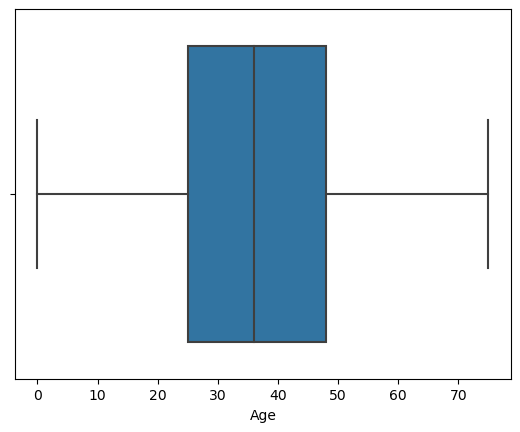

In [24]:
### Check for outliers
sns.boxplot(x=data.Age)

Insights : we have no outlier

Scaling 

In [25]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform the 'Age' column
data['Age_normalized'] = scaler.fit_transform(data[['Age']])

# Now, data['Age_normalized'] contains the normalized values of 'Age'

In [27]:
# Supposons que vous ayez votre série de données 'Age' dans le DataFrame 'data'
data_age = data['Age_normalized']

# Effectuer le test de normalité de Jarque-Bera
jb_statistic, p_value = stats.jarque_bera(data_age)

# Niveau de signification courant (par exemple, 0,05)
alpha = 0.05

# Affichage du résultat
if p_value > alpha:
    print("La distribution de 'Age' semble être normale")
else:
    print("La distribution de 'Age' ne semble pas être normale ")

La distribution de 'Age' ne semble pas être normale 


In [28]:
import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(data)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |                                             | [  0%]   00:00 ->…


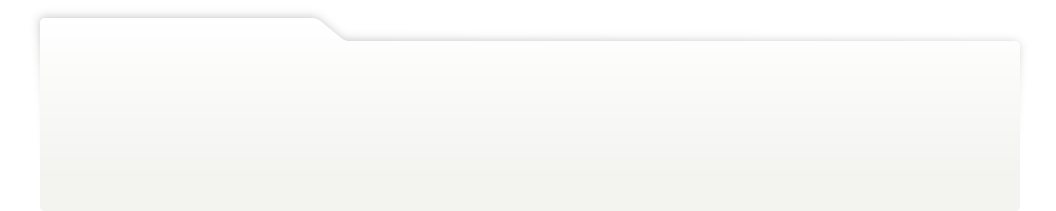
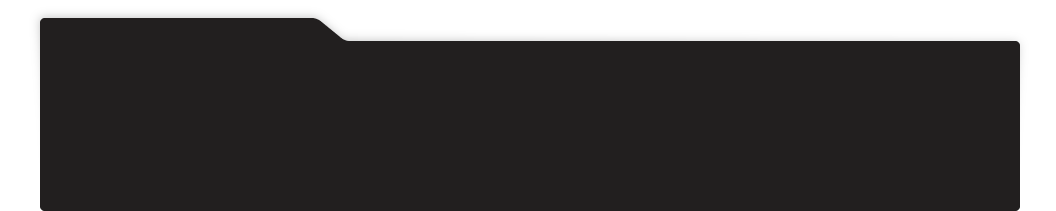
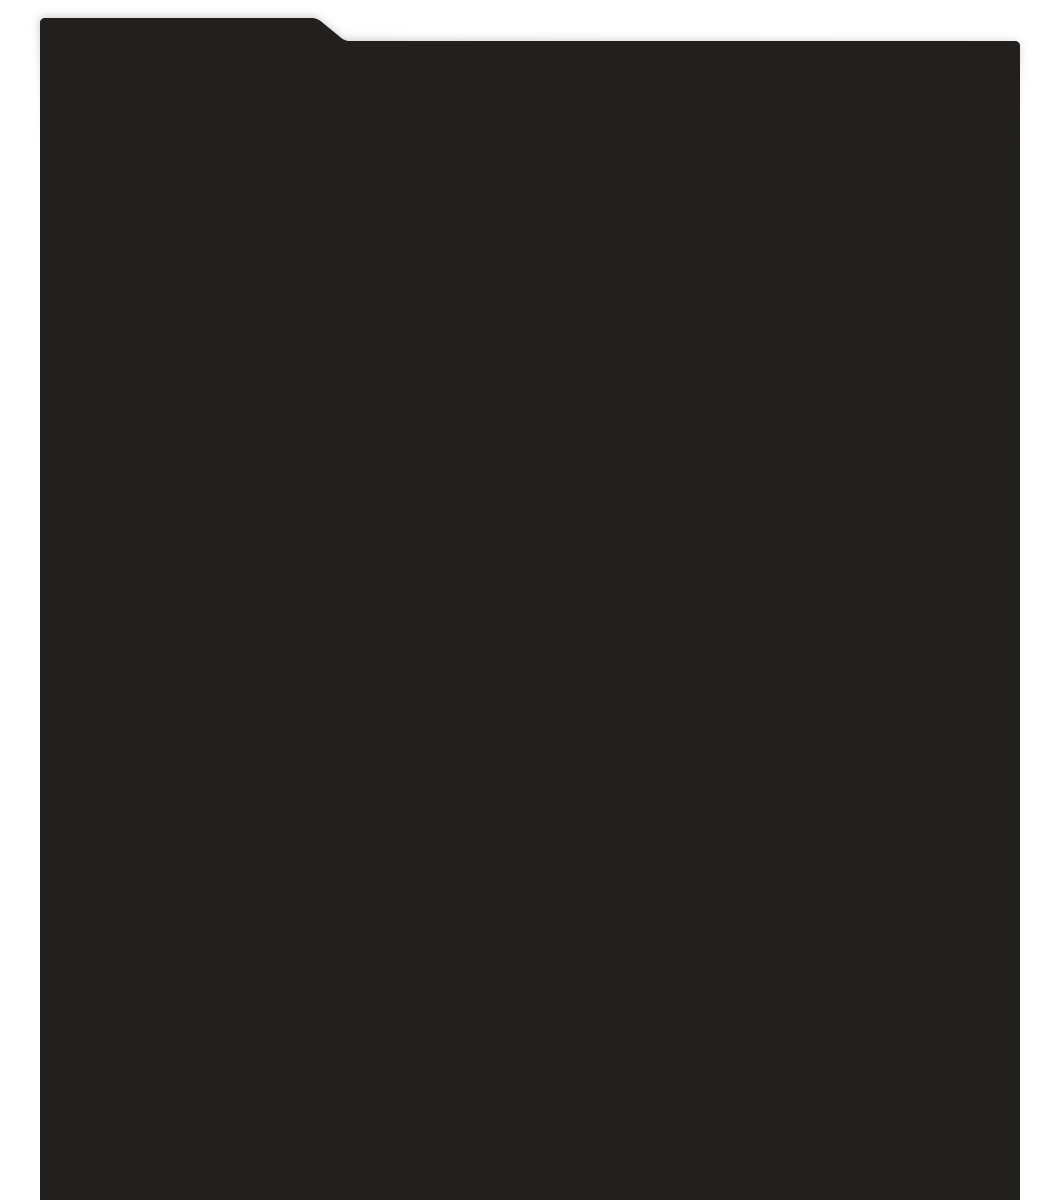
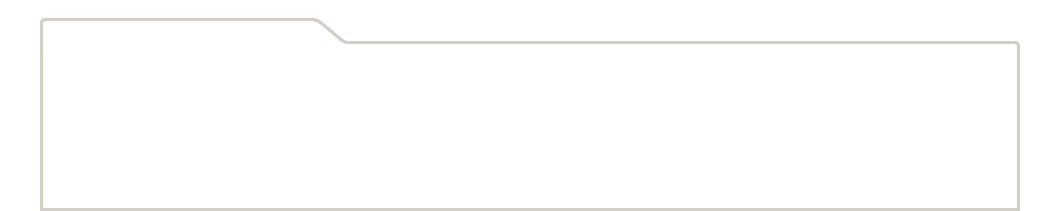
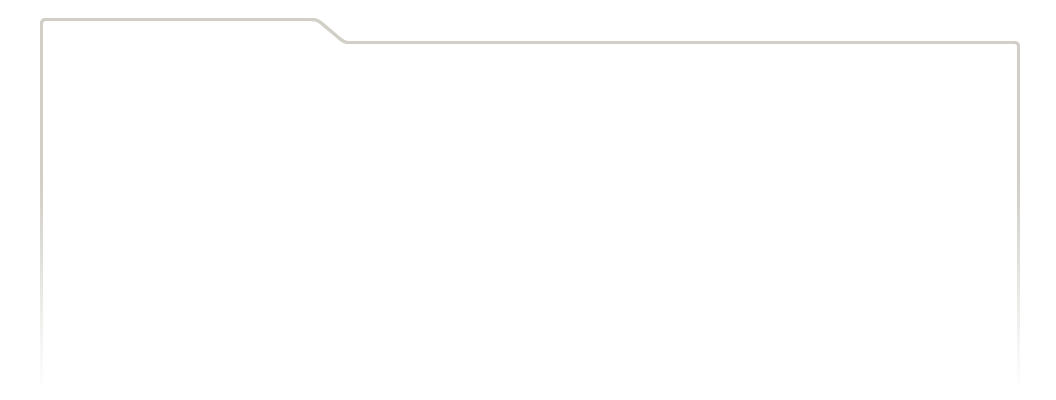
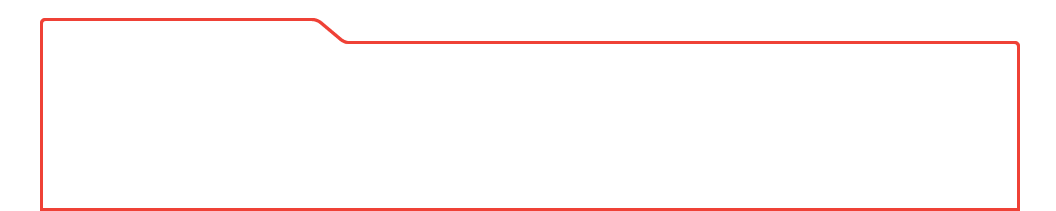
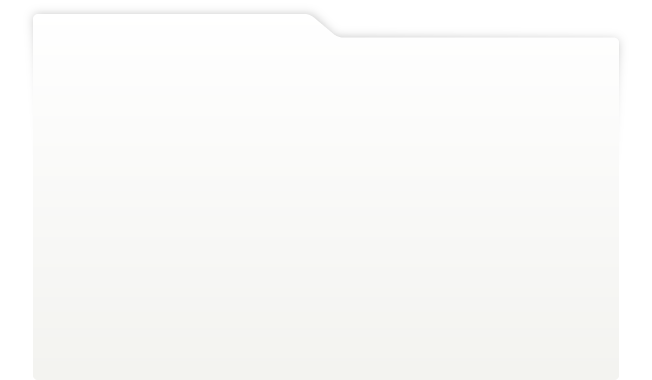
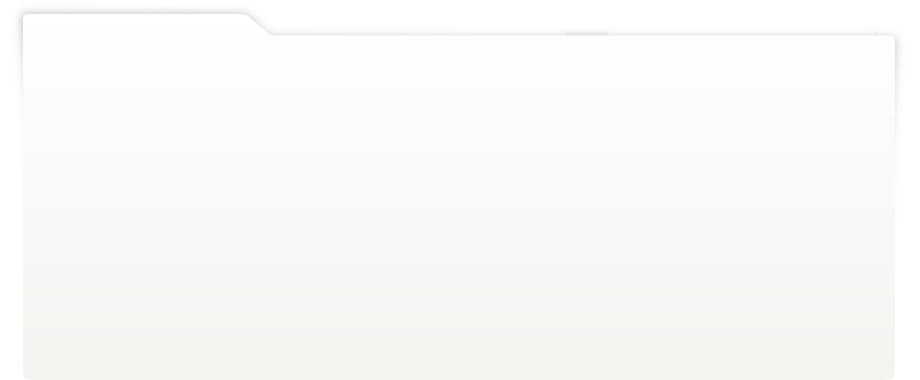
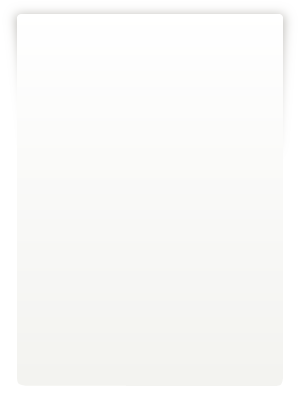
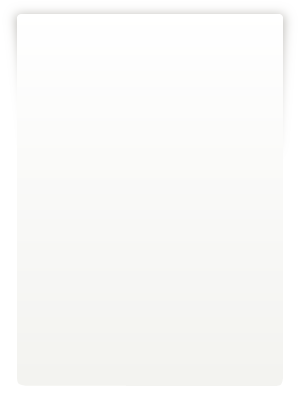
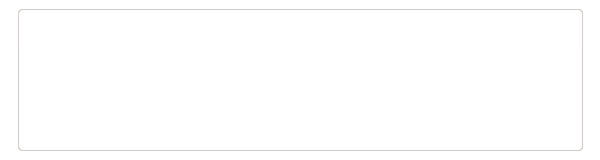
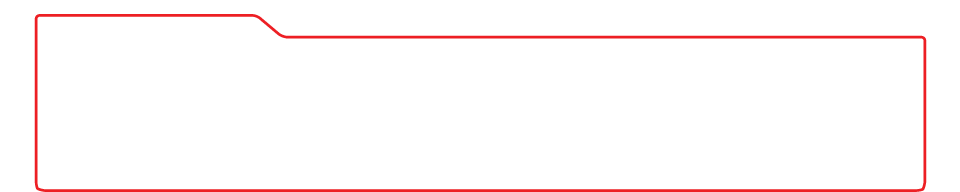
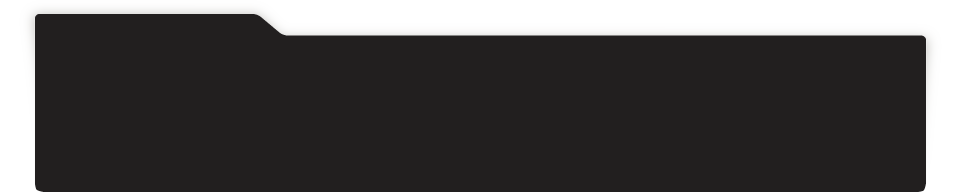
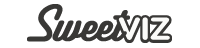
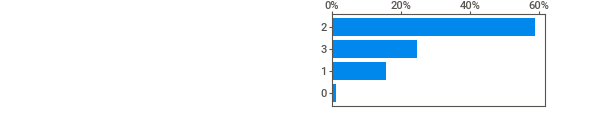
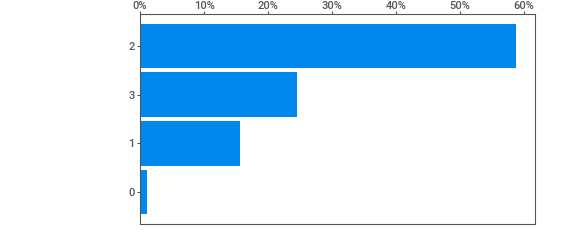
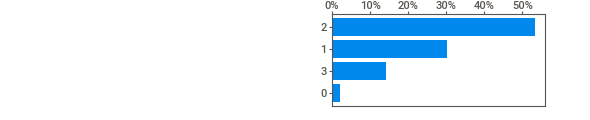
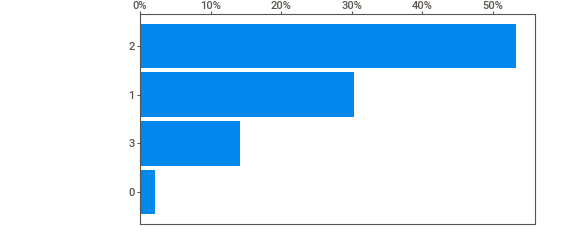
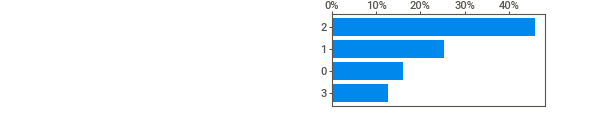
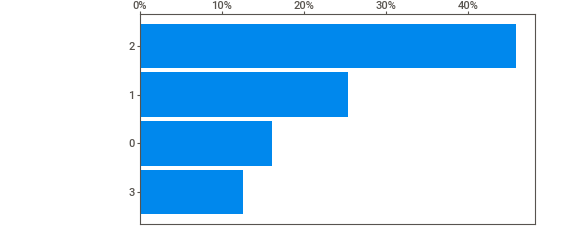
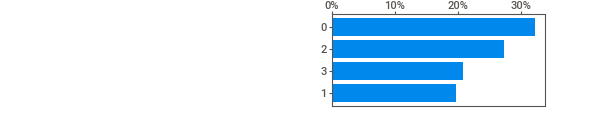
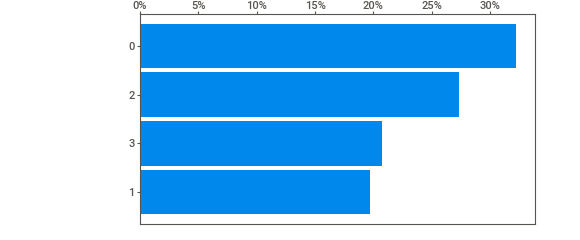
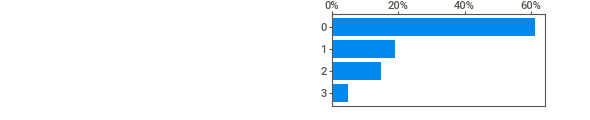
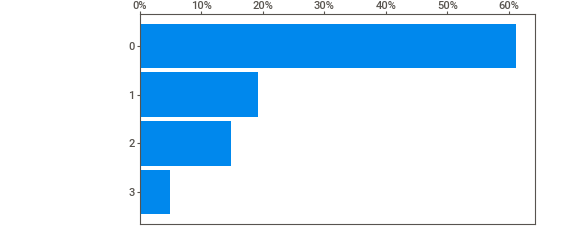
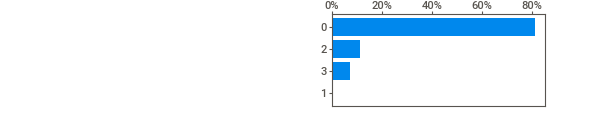
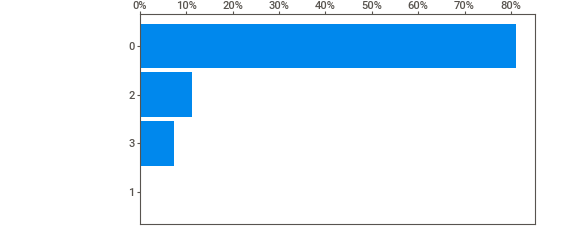
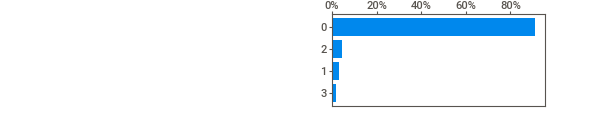
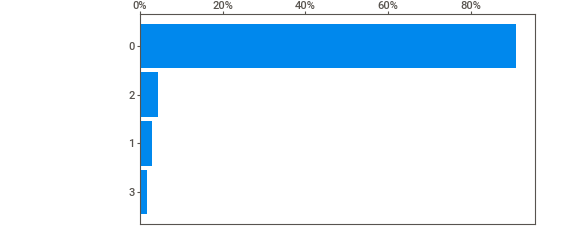
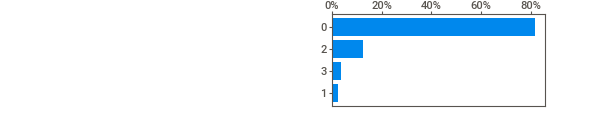
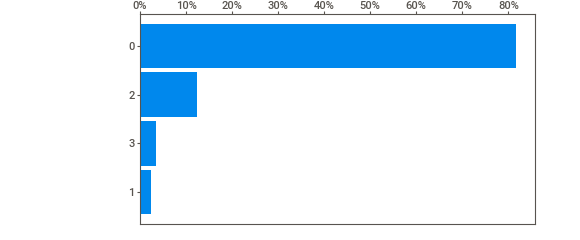
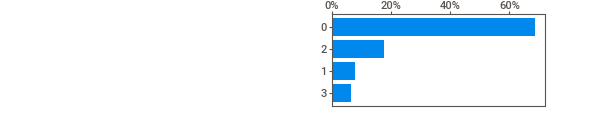
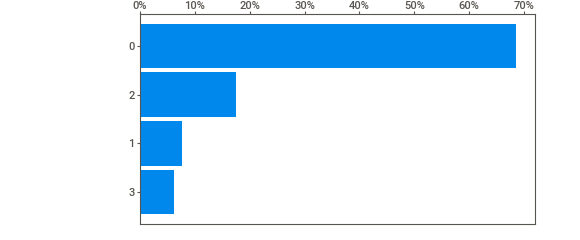
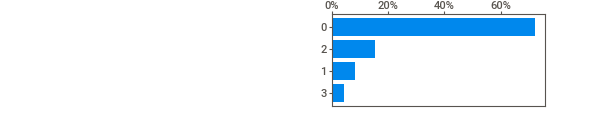
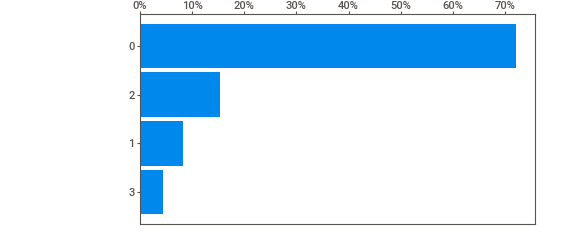
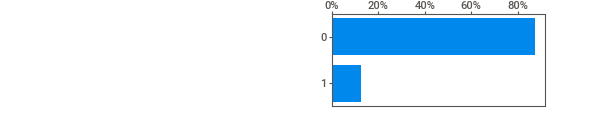
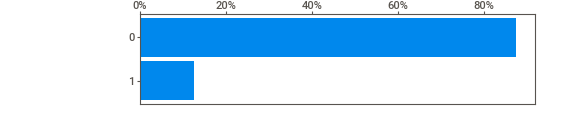
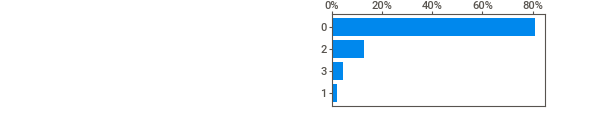
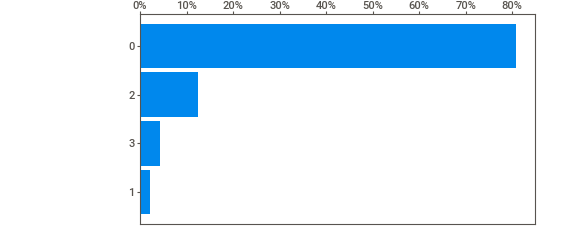
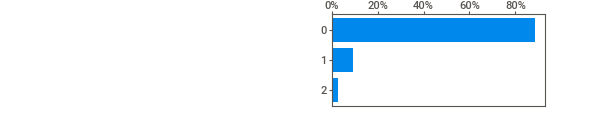
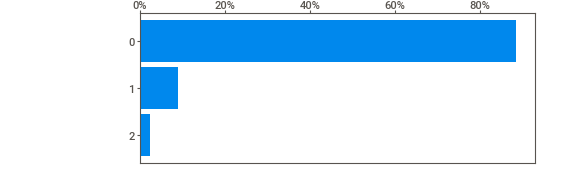
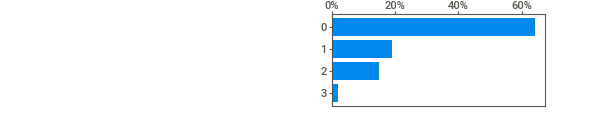
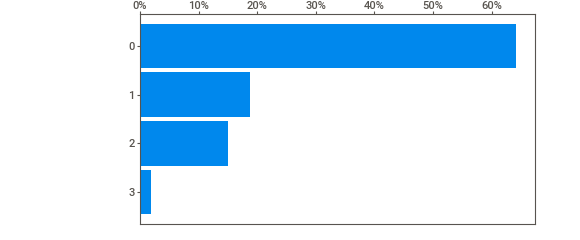
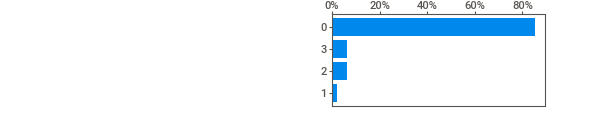
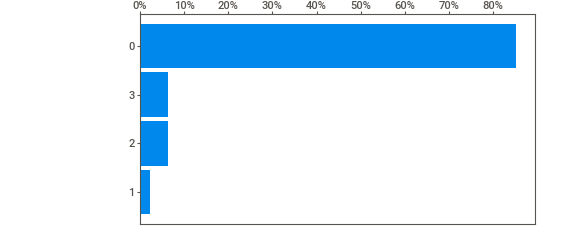
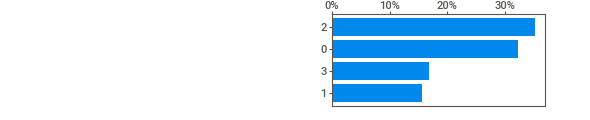
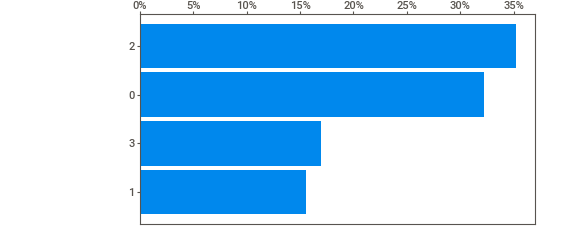
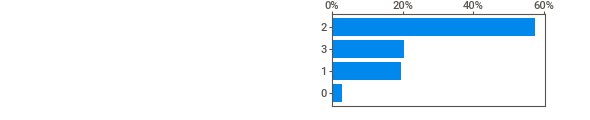
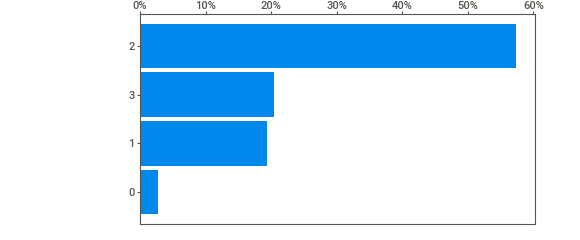
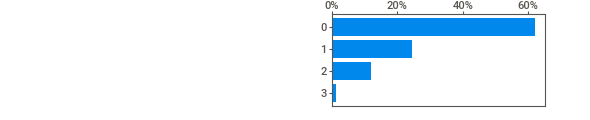
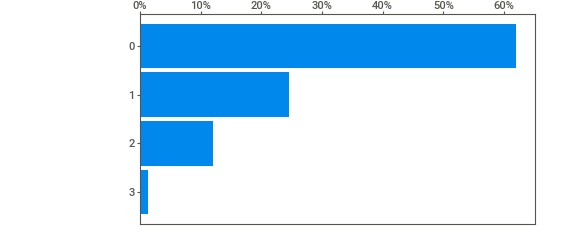
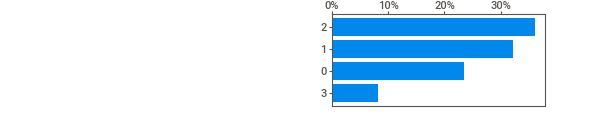
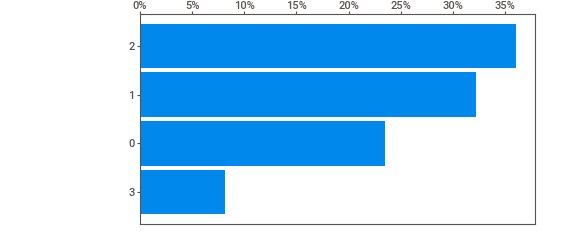
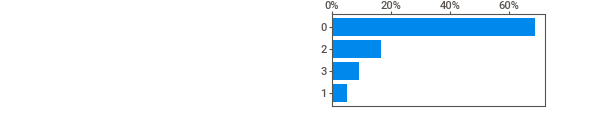
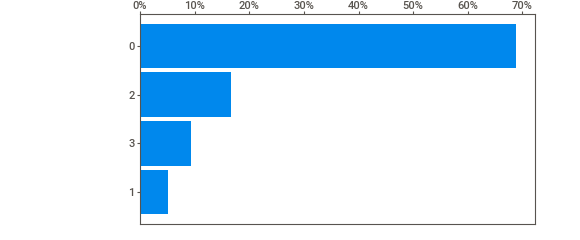
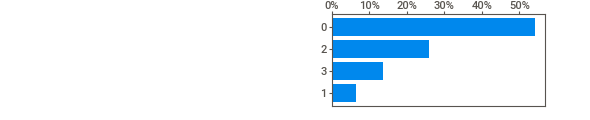
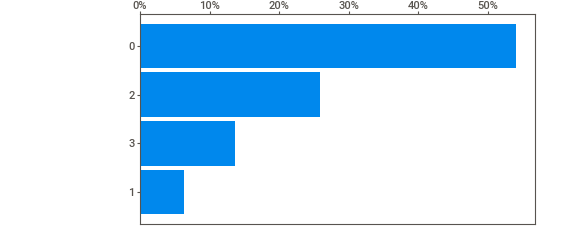
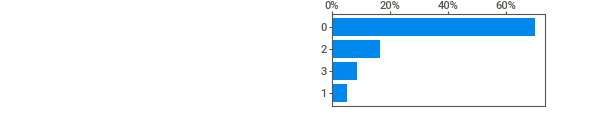
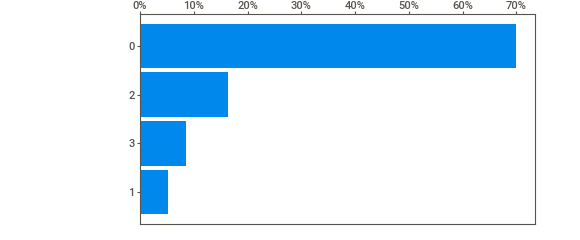
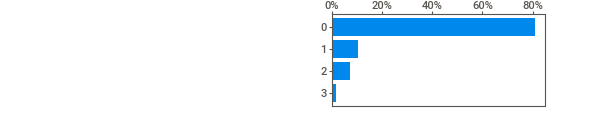
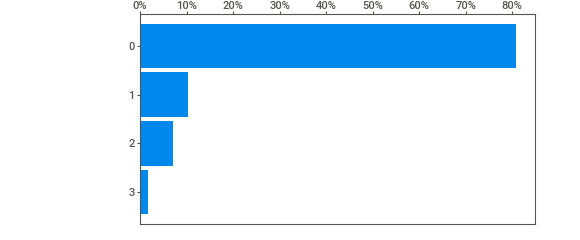
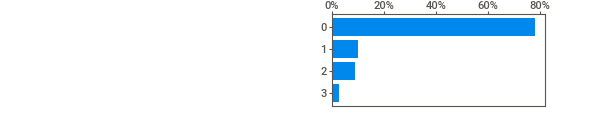
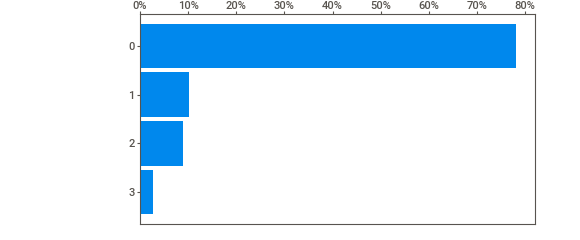
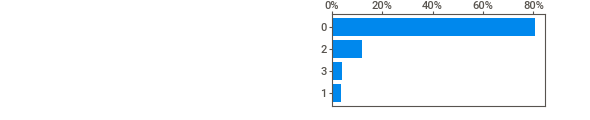
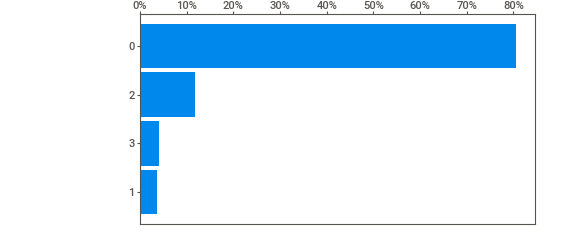
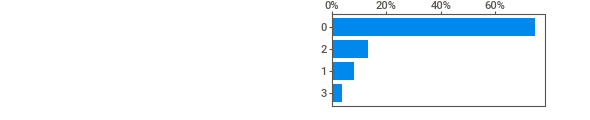
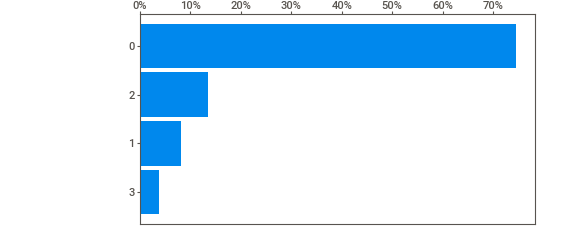
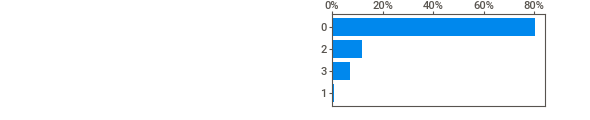
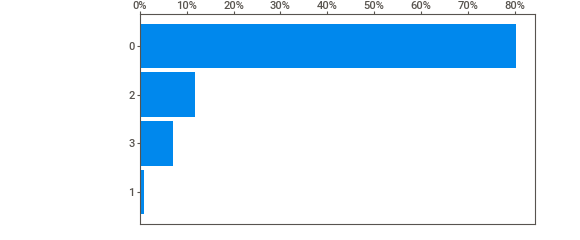
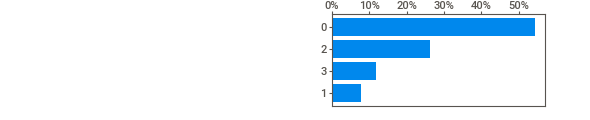
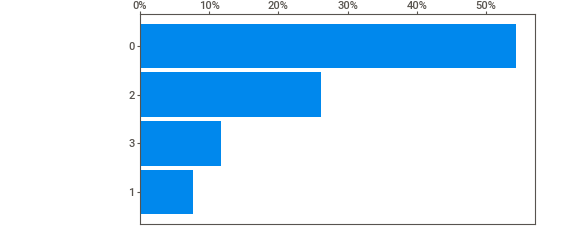
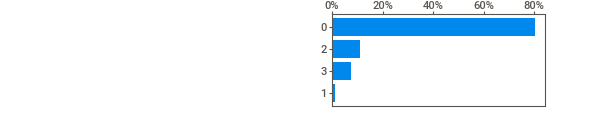
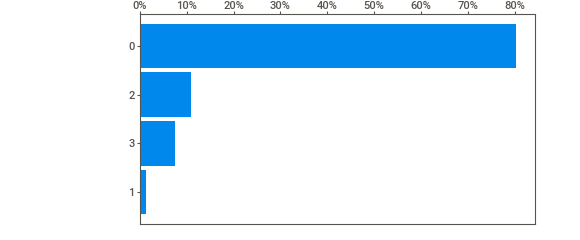
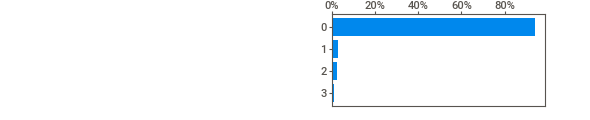
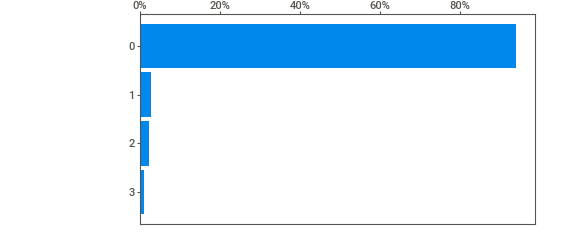
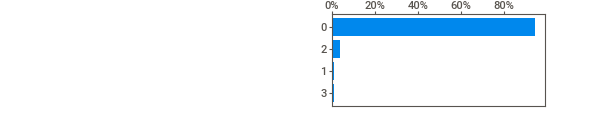
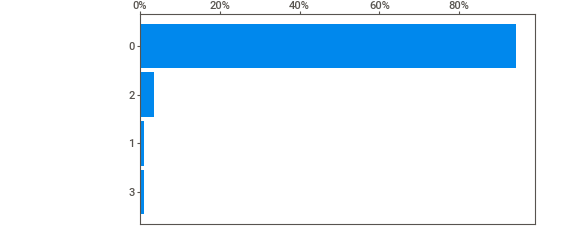
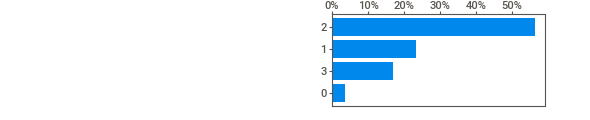
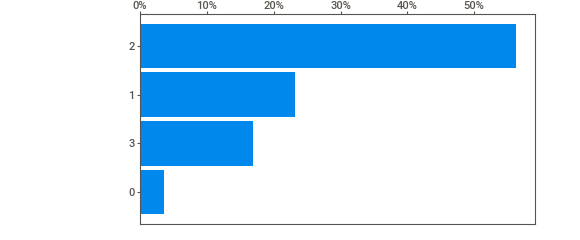
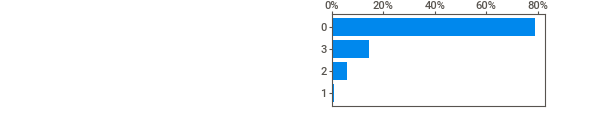
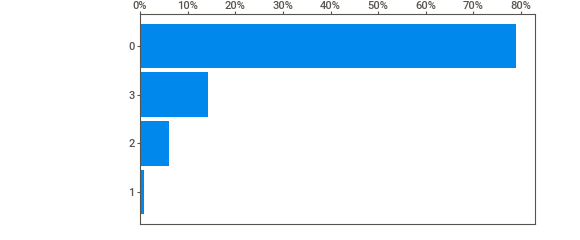
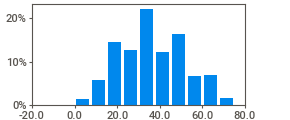
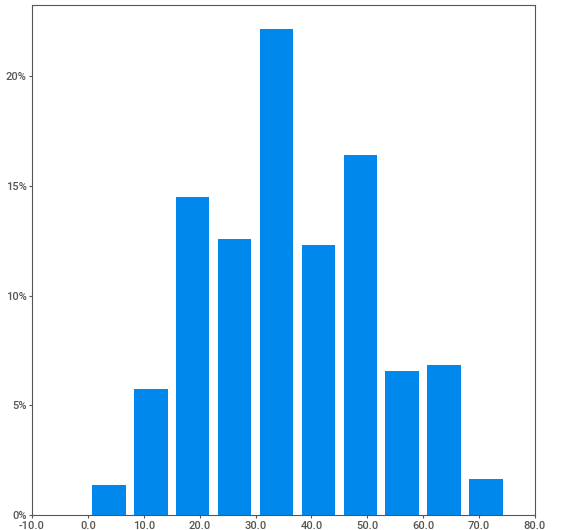
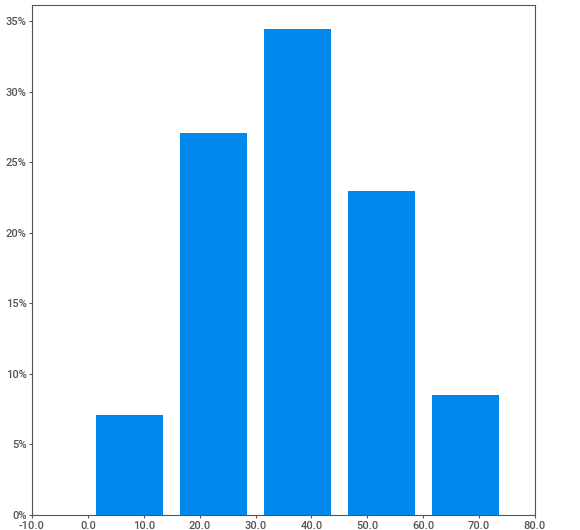
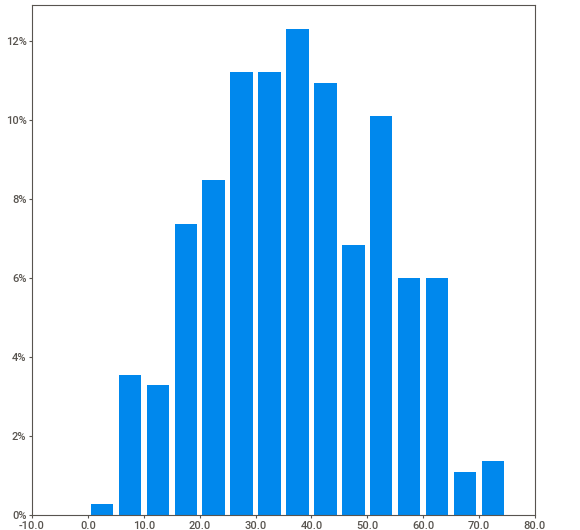
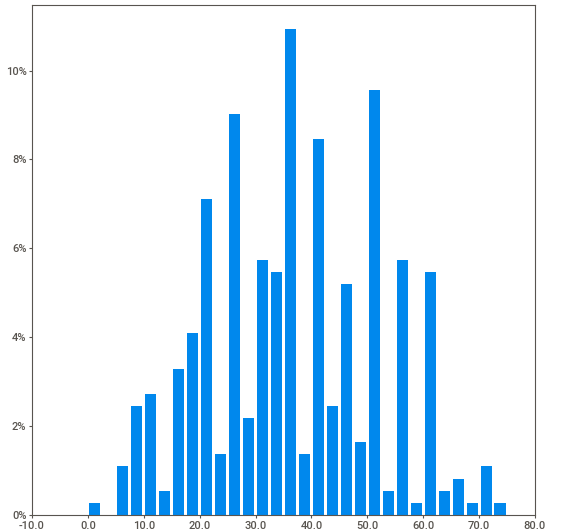
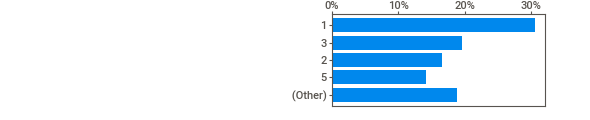
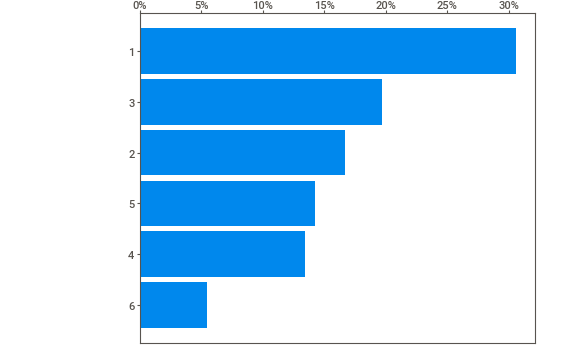
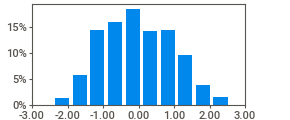
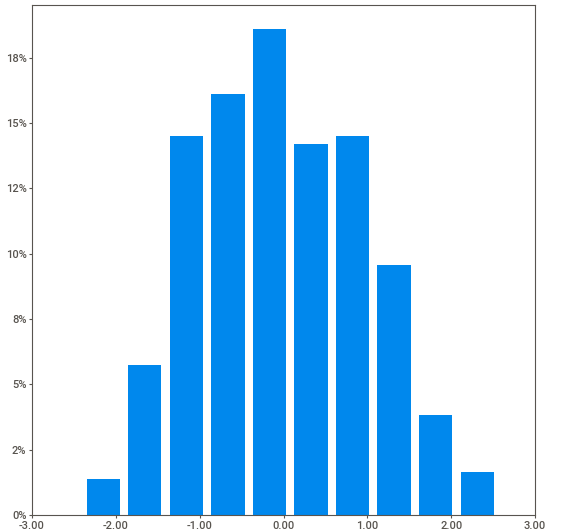
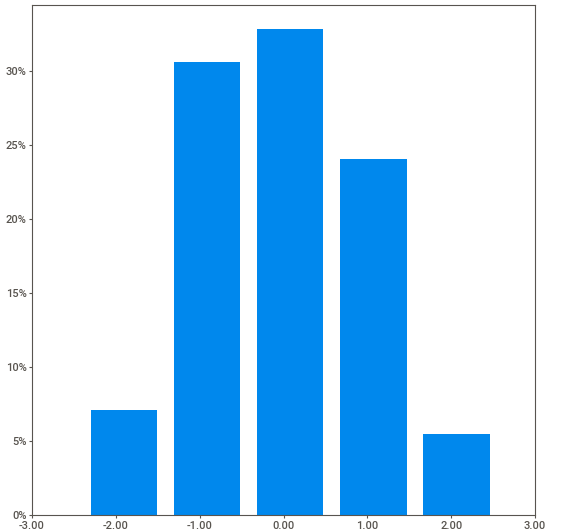
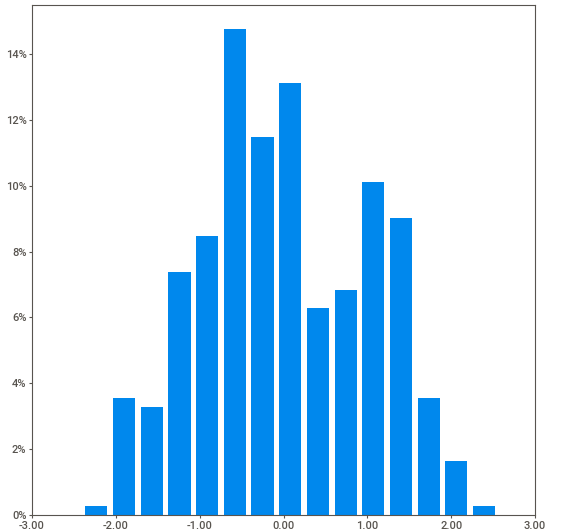
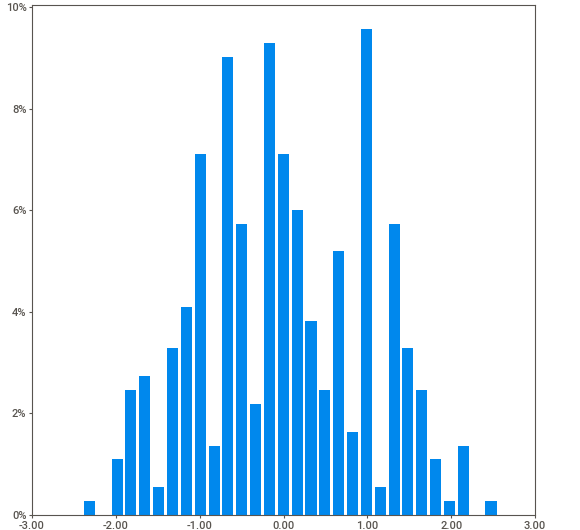
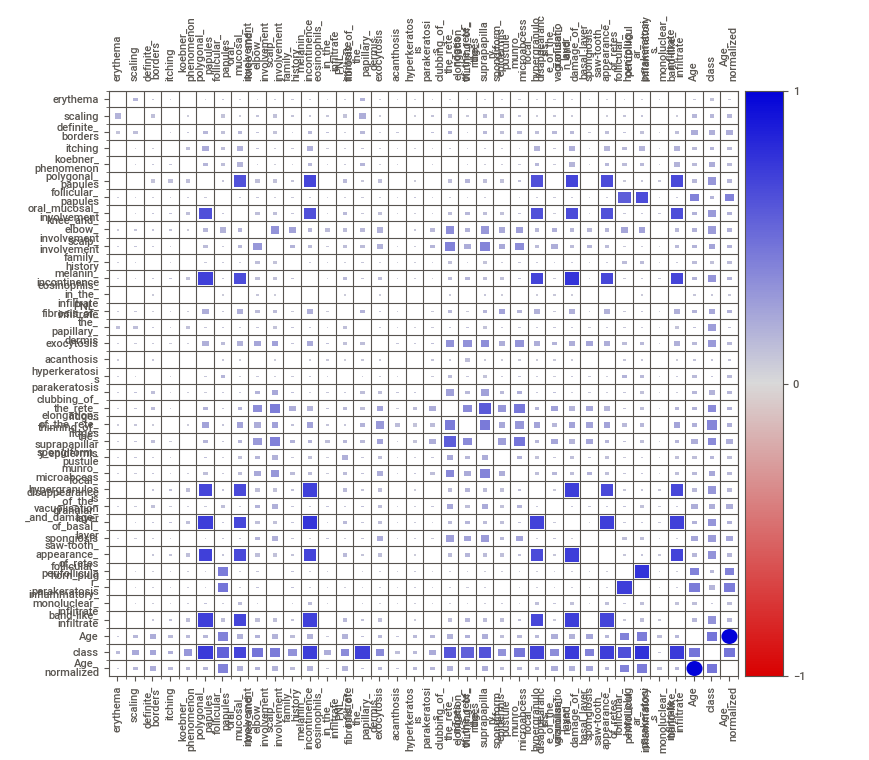
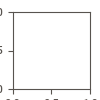

In [29]:
import sweetviz as sv

# Supposons que vous ayez un DataFrame nommé 'data'
my_report = sv.analyze(data)  # Générer le rapport Sweetviz

# Afficher le rapport directement dans le cahier Jupyter
my_report.show_notebook()

In [33]:

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Supposons que vous ayez un DataFrame 'data' avec des variables catégoriques
# Créez une table de contingence pour chaque paire de variables catégoriques
cramer_matrix = pd.DataFrame(index=data.columns, columns=data.columns)

for var1 in data.columns:
    for var2 in data.columns:
        if var1 != var2:
            contingency_table = pd.crosstab(data[var1], data[var2])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            cramer_value = np.sqrt(chi2 / (n * min(contingency_table.shape) - 1))
            cramer_matrix.loc[var1, var2] = cramer_value


In [34]:
cramer_matrix

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class,Age_normalized
erythema,NaN,0.25915,0.16355,0.069157,0.057682,0.070086,0.104462,0.087886,0.088966,0.12707,...,0.067711,0.081879,0.068888,0.041825,0.042339,0.073562,0.049987,0.315587,0.231952,0.315587
scaling,0.25915,NaN,0.205706,0.072293,0.097586,0.071445,0.09425,0.083357,0.159452,0.163697,...,0.091874,0.111062,0.075661,0.068591,0.064935,0.069628,0.0786,0.373699,0.300483,0.373699
definite_borders,0.16355,0.205706,NaN,0.125254,0.151136,0.177231,0.104456,0.16533,0.162056,0.148953,...,0.163317,0.146073,0.154419,0.090401,0.088672,0.092649,0.157462,0.371539,0.325201,0.371539
itching,0.069157,0.072293,0.125254,NaN,0.197336,0.217157,0.125242,0.192832,0.178427,0.111368,...,0.199605,0.093592,0.194101,0.115408,0.122414,0.065199,0.201964,0.340074,0.302283,0.340074
koebner_phenomenon,0.057682,0.097586,0.151136,0.197336,NaN,0.22193,0.102485,0.212021,0.078142,0.077436,...,0.214608,0.07014,0.211303,0.09142,0.098251,0.103916,0.227219,0.346805,0.343128,0.346805
polygonal_papules,0.070086,0.071445,0.177231,0.217157,0.22193,NaN,0.075893,0.46645,0.156111,0.135942,...,0.560591,0.081539,0.486087,0.051373,0.059479,0.134023,0.489997,0.421486,0.487161,0.421486
follicular_papules,0.104462,0.09425,0.104456,0.125242,0.102485,0.075893,NaN,0.074534,0.178199,0.07922,...,0.077919,0.097675,0.077919,0.480692,0.452545,0.069695,0.129373,0.447268,0.451031,0.447268
oral_mucosal_involvement,0.087886,0.083357,0.16533,0.192832,0.212021,0.46645,0.074534,NaN,0.160263,0.14717,...,0.50265,0.120261,0.480436,0.062219,0.058414,0.143923,0.482756,0.366551,0.47844,0.366551
knee_and_elbow_involvement,0.088966,0.159452,0.162056,0.178427,0.078142,0.156111,0.178199,0.160263,NaN,0.36979,...,0.157871,0.224269,0.160583,0.191097,0.195245,0.097467,0.165016,0.400146,0.422469,0.400146
scalp_involvement,0.12707,0.163697,0.148953,0.111368,0.077436,0.135942,0.07922,0.14717,0.36979,NaN,...,0.138307,0.225771,0.140196,0.061031,0.048966,0.050125,0.152945,0.33581,0.393166,0.33581


In [35]:
# Set the threshold for Cramer's V value
threshold = 0.4

# Create an empty list to store correlated variable pairs
correlated_variable_pairs = []

# Iterate through the DataFrame to find correlated variable pairs
for var1 in cramer_matrix.columns:
    for var2 in cramer_matrix.columns:
        if var1 != var2 and cramer_matrix.loc[var1, var2] > threshold:
            correlated_variable_pairs.append((var1, var2))

# Print the correlated variable pairs
print("Variable pairs with correlation > 40%:")
for pair in correlated_variable_pairs:
    print(pair)

Variable pairs with correlation > 40%:
('polygonal_papules', 'oral_mucosal_involvement')
('polygonal_papules', 'melanin_incontinence')
('polygonal_papules', 'focal_hypergranulosis')
('polygonal_papules', 'vacuolisation_and_damage_of_basal_layer')
('polygonal_papules', 'saw-tooth_appearance_of_retes')
('polygonal_papules', 'band-like_infiltrate')
('polygonal_papules', 'Age')
('polygonal_papules', 'class')
('polygonal_papules', 'Age_normalized')
('follicular_papules', 'follicular_horn_plug')
('follicular_papules', 'perifollicular_parakeratosis')
('follicular_papules', 'Age')
('follicular_papules', 'class')
('follicular_papules', 'Age_normalized')
('oral_mucosal_involvement', 'polygonal_papules')
('oral_mucosal_involvement', 'melanin_incontinence')
('oral_mucosal_involvement', 'focal_hypergranulosis')
('oral_mucosal_involvement', 'vacuolisation_and_damage_of_basal_layer')
('oral_mucosal_involvement', 'saw-tooth_appearance_of_retes')
('oral_mucosal_involvement', 'band-like_infiltrate')
('o

In [37]:
data2 = pd.DataFrame(data, columns=['polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'melanin_incontinence', 'fibrosis_of_the_papillary_dermis', 'exocytosis',
'clubbing_of_the_rete_ridges', 'elongation_of_the_rete_ridges', 'thinning_of_the_suprapapillary_epidermis', 'focal_hypergranulosis',
'vacuolisation_and_damage_of_basal_layer', 'spongiosis', 'saw-tooth_appearance_of_retes', 'follicular_horn_plug', 'perifollicular_parakeratosis',
'band-like_infiltrate', 'Age_normalized'])

In [38]:
data2

,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,melanin_incontinence,fibrosis_of_the_papillary_dermis,exocytosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,focal_hypergranulosis,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,band-like_infiltrate,Age_normalized
0,0,0,0,1,0,0,3,0,0,0,0,0,3,0,0,0,0,1.236230
1,0,0,0,1,0,0,1,2,2,2,0,0,0,0,0,0,0,-1.869148
2,3,0,3,0,1,0,1,0,0,0,2,2,3,2,0,0,3,-0.679854
3,0,0,0,3,0,0,0,2,2,2,0,0,0,0,0,0,0,0.245152
4,2,0,2,0,1,0,1,0,0,0,2,3,2,3,0,0,3,0.575511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,-0.745926
362,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,-0.019136
363,2,0,2,0,2,0,3,0,0,0,3,3,0,3,0,0,3,-0.547711
364,3,0,2,0,2,0,3,0,0,0,3,2,0,1,0,0,3,0.905871


In [39]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   polygonal_papules                         366 non-null    int64  
 1   follicular_papules                        366 non-null    int64  
 2   oral_mucosal_involvement                  366 non-null    int64  
 3   knee_and_elbow_involvement                366 non-null    int64  
 4   melanin_incontinence                      366 non-null    int64  
 5   fibrosis_of_the_papillary_dermis          366 non-null    int64  
 6   exocytosis                                366 non-null    int64  
 7   clubbing_of_the_rete_ridges               366 non-null    int64  
 8   elongation_of_the_rete_ridges             366 non-null    int64  
 9   thinning_of_the_suprapapillary_epidermis  366 non-null    int64  
 10  focal_hypergranulosis                 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Charger vos données
# data = pd.read_csv('votre_fichier.csv')  # Remplacez 'votre_fichier.csv' par le nom de votre fichier de données
# Assurez-vous que vos données contiennent une colonne de variables dépendantes (y) et des caractéristiques (X).

# Créez les variables X et y
X=data2
y=data['class']

# Divisez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle de régression logistique multiclasse
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Ajustez le modèle aux données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)

# Rapport de classification
classification_report = classification_report(y_test, y_pred)
print("Rapport de classification :\n", classification_report)

NameError: name 'data2' is not defined

# LogisticRegression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Charger vos données
# data = pd.read_csv('votre_fichier.csv')  # Remplacez 'votre_fichier.csv' par le nom de votre fichier de données

# Créez les variables X et y
X = data2
y = data['class']

# Divisez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle de régression logistique (supprimez le paramètre multi_class)
model = LogisticRegression(solver='lbfgs')

# Ajustez le modèle aux données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracyLogisticRegression = accuracy_score(y_test, y_pred)
print("Précision du modèle accuracyLogisticRegression:", accuracyLogisticRegression)

# Rapport de classification
classification_report = classification_report(y_test, y_pred)
print("Rapport de classification :\n", classification_report)

# Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Charger vos données
# data = pd.read_csv('votre_fichier.csv')  # Remplacez 'votre_fichier.csv' par le nom de votre fichier de données

# Créez les variables X et y
X = data2
y = data['class']

# Divisez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle de forêt aléatoire
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Ajustez le modèle aux données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)

# Rapport de classification
classification_report = classification_report(y_test, y_pred)
print("Rapport de classification :\n", classification_report)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Charger vos données
# data = pd.read_csv('votre_fichier.csv')  # Remplacez 'votre_fichier.csv' par le nom de votre fichier de données

# Créez les variables X et y
X = data2
y = data['class']

# Divisez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle de Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Ajustez le modèle aux données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)

# Rapport de classification
classification_report = classification_report(y_test, y_pred)
print("Rapport de classification :\n", classification_report)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Charger vos données
# data = pd.read_csv('votre_fichier.csv')  # Remplacez 'votre_fichier.csv' par le nom de votre fichier de données

# Créez les variables X et y
X = data2
y = data['class']

# Divisez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez des modèles
models = [
    ('Régression Logistique', LogisticRegression(solver='lbfgs')),
    ('Forêt Aléatoire', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Créez un tableau pour stocker les résultats
results = []

# Boucle à travers les modèles
for model_name, model in models:
    # Ajustez le modèle aux données d'entraînement
    model.fit(X_train, y_train)

    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Calcul de métriques
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Ajoutez les résultats au tableau
    results.append({
        'Modèle': model_name,
        'Précision': accuracy,
        'Rappel': classification_rep['macro avg']['recall'],
        'F-mesure': classification_rep['macro avg']['f1-score'],
        'Matrice de Confusion': confusion_mat
    })

# Affichez les résultats dans un tableau pandas
results_df = pd.DataFrame(results)
print(results_df)

# Affichez les courbes ROC pour les modèles
plt.figure(figsize=(10, 6))
for model_name, model in models:
    y_prob = model.predict_proba(X_test)
    n_classes = len(model.classes_)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=model.classes_[i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[0], tpr[0], label=f'{model_name} (AUC = {roc_auc[0]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Charger vos données
# data = pd.read_csv('votre_fichier.csv')  # Remplacez 'votre_fichier.csv' par le nom de votre fichier de données

# Créez les variables X et y
X = data2
y = data['class']

# Divisez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle de forêt aléatoire
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Définissez une grille d'hyperparamètres à rechercher
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créez un objet GridSearchCV pour la recherche d'hyperparamètres
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Effectuez la recherche d'hyperparamètres sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Obtenez les meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres trouvés :", best_params)

# Utilisez les meilleurs hyperparamètres pour créer le modèle final
best_model = RandomForestClassifier(random_state=42, class_weight='balanced', **best_params)

# Ajustez le modèle aux données d'entraînement
best_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle avec les meilleurs hyperparamètres :", accuracy)

# Rapport de classification
classification_report = classification_report(y_test, y_pred)
print("Rapport de classification :\n", classification_report)

Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Charger vos données
# data = pd.read_csv('votre_fichier.csv')  # Remplacez 'votre_fichier.csv' par le nom de votre fichier de données

# Créez les variables X et y
X = data2
y = data['class']

# Divisez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle de Gradient Boosting
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Ajustez le modèle aux données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)

# Rapport de classification
classification_report = classification_report(y_test, y_pred)
print("Rapport de classification :\n", classification_report)

# Matrice de confusion
confusion_mat = confusion_matrix(y_test, y_pred)
print("Matrice de Confusion :\n", confusion_mat)

# Courbes ROC
y_prob = model.predict_proba(X_test)
n_classes = len(model.classes_)

plt.figure(figsize=(10, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=model.classes_[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Classe {model.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

modèle de réseau de neurones

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Charger vos données
# data = pd.read_csv('votre_fichier.csv')  # Remplacez 'votre_fichier.csv' par le nom de votre fichier de données

# Créez les variables X et y
X = data2
y = data['class']

# Divisez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle de réseau de neurones
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Ajustez le modèle aux données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)

# Rapport de classification
classification_report = classification_report(y_test, y_pred)
print("Rapport de classification :\n", classification_report)

# Matrice de confusion
confusion_mat = confusion_matrix(y_test, y_pred)
print("Matrice de Confusion :\n", confusion_mat)

# Courbes ROC
y_prob = model.predict_proba(X_test)
n_classes = len(model.classes_)

plt.figure(figsize=(10, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=model.classes_[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Classe {model.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

modèle CNN

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Charger vos données
# data = pd.read_csv('votre_fichier.csv')  # Remplacez 'votre_fichier.csv' par le nom de votre fichier de données

# Créez les variables X et y
X = data2
y = data['class']

# Divisez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prétraitement des données (normalisation)
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Créez un modèle CNN
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Reshape((X_train.shape[1], 1)),
    layers.Conv1D(32, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')  # 6 classes pour la classification
])

# Compilez le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînez le modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2)

# Évaluation du modèle
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
print("Précision du modèle CNN :", accuracy)

classification_report = classification_report(y_test, y_pred_classes)
print("Rapport de classification CNN :\n", classification_report)

confusion_mat = confusion_matrix(y_test, y_pred_classes)
print("Matrice de Confusion CNN :\n", confusion_mat)

# Courbes ROC (non applicables aux modèles de classification multiclasse)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Charger vos données
# data = pd.read_csv('votre_fichier.csv')  # Remplacez 'votre_fichier.csv' par le nom de votre fichier de données

# Créez les variables X et y
X = data2
y = data['class']

# Divisez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Appliquez la PCA pour réduire la dimensionnalité
pca = PCA(n_components=10)  # Réduisez à 10 composantes principales (ajustez ce nombre selon vos besoins)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Créez un modèle (par exemple, un modèle de forêt aléatoire) avec les données PCA
model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test_pca)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle avec PCA sans normalisation :", accuracy)